In [2]:
!pip install xgboost

In [3]:
# Import our dependencies
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import pandas as pd
import tensorflow as tf
import numpy as np

#models
from xgboost import XGBRegressor

#  Import and read the charity_data.csv.
import pandas as pd

# Get data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Prepare Data

In [4]:
df_raw = pd.read_csv('/content/drive/My Drive/Colab Notebooks/energy_weather_joined.csv')
df_raw.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 05:00:00+01:00,410.0,178.0,0.0,4038.0,3590.0,156.0,0.0,0.0,0.0,...,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 07:00:00+01:00,408.0,172.0,0.0,4030.0,3208.0,160.0,0.0,0.0,0.0,...,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 11:00:00+01:00,421.0,226.0,0.0,3931.0,3845.0,166.0,0.0,0.0,0.0,...,1,255,0.0,0.0,0.0,0,800,clear,sky is clear,01d


In [5]:
# get the columns name as reference for below
df_raw.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed',

In [6]:
df=df_raw.drop(["generation marine", "generation wind offshore", "forecast solar day ahead", "forecast wind onshore day ahead", "forecast wind onshore day ahead", "forecast wind offshore eday ahead", "total load forecast", "price day ahead", "generation hydro pumped storage aggregated"], axis=1)

In [7]:
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 05:00:00+01:00,410.0,178.0,0.0,4038.0,3590.0,156.0,0.0,0.0,0.0,...,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 07:00:00+01:00,408.0,172.0,0.0,4030.0,3208.0,160.0,0.0,0.0,0.0,...,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 11:00:00+01:00,421.0,226.0,0.0,3931.0,3845.0,166.0,0.0,0.0,0.0,...,1,255,0.0,0.0,0.0,0,800,clear,sky is clear,01d


In [8]:
df=df.drop(["weather_id", "weather_icon", "weather_description", "weather_main", "temp_min", "city_name", "temp_max"], axis=1)
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,price actual,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,65.41,270.475,1001,77,1,62,0.0,0.0,0.0,0
1,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,56.04,269.686,1002,78,0,23,0.0,0.0,0.0,0
2,2015-01-01 05:00:00+01:00,410.0,178.0,0.0,4038.0,3590.0,156.0,0.0,0.0,0.0,...,53.63,270.292,1004,71,2,321,0.0,0.0,0.0,0
3,2015-01-01 07:00:00+01:00,408.0,172.0,0.0,4030.0,3208.0,160.0,0.0,0.0,0.0,...,51.43,270.292,1004,71,2,321,0.0,0.0,0.0,0
4,2015-01-01 11:00:00+01:00,421.0,226.0,0.0,3931.0,3845.0,166.0,0.0,0.0,0.0,...,59.86,284.824,1006,55,1,255,0.0,0.0,0.0,0


In [9]:
#split time (datetime format) column into date and time
datetimezone = df['time'].astype("string")
datelist = []
timelist = []

for datetimerow in datetimezone:
    date, time = datetimerow.split(" ", 1)
    time, timezone = time.split("+", 1)
    datelist.append(date)
    timelist.append(time)

In [10]:
monthlist = []
daylist = []

for date in datelist:
  year, yearless = date.split("-", 1)
  month, day = yearless.split("-", 1)
  daylist.append(day)
  monthlist.append(month)

df['day'] = daylist
df['month'] = monthlist

In [11]:
hourlist = []

for time in timelist:
  hour, hourless = time.split(":", 1)
  hourlist.append(hour)

df['hour'] = hourlist

In [12]:
df=df.drop(["time"], axis=1)

In [13]:
df['month'] = df['month'].astype('int')
df['day'] = df['day'].astype('int')
df['hour'] = df['hour'].astype('int')

In [14]:
df.isnull().sum()

generation biomass                              95
generation fossil brown coal/lignite            90
generation fossil coal-derived gas              90
generation fossil gas                           90
generation fossil hard coal                     90
generation fossil oil                           95
generation fossil oil shale                     90
generation fossil peat                          90
generation geothermal                           90
generation hydro pumped storage consumption     95
generation hydro run-of-river and poundage      95
generation hydro water reservoir                90
generation nuclear                              85
generation other                                90
generation other renewable                      90
generation solar                                90
generation waste                                95
generation wind onshore                         90
total load actual                              180
price actual                   

In [15]:
df_nonulls = df.dropna()

# Scaling the Data using StandardScaler()

In [56]:
x_nonulls = df_nonulls.loc[:,df_nonulls.columns != "price actual"]
x = df.loc[:,df.columns != "price actual"]
x_columns = df_nonulls.loc[:,df_nonulls.columns != "price actual"].columns

#scale the data
x_scaled_nonulls = StandardScaler().fit_transform(x_nonulls)
x_scaled = StandardScaler().fit_transform(x)

In [49]:
x_scaled_nonulls

array([[ 0.75095568, -0.33672275,  0.        , ..., -1.67345975,
        -1.59745252, -1.66299088],
       [ 0.52796893, -0.73747298,  0.        , ..., -1.67345975,
        -1.59745252, -1.08412984],
       [ 0.31671833, -0.76287264,  0.        , ..., -1.67345975,
        -1.59745252, -0.93941458],
       ...,
       [-1.02120213, -1.26522152,  0.        , ...,  1.73416348,
         1.58140436,  1.23131434],
       [-1.05641057, -1.26522152,  0.        , ...,  1.73416348,
         1.58140436,  1.52074486],
       [-1.091619  , -1.26522152,  0.        , ...,  1.73416348,
         1.58140436,  1.66546012]])

In [57]:
df_scaled_nonulls = pd.DataFrame(x_scaled_nonulls, columns=x_columns)
df_scaled = pd.DataFrame(x_scaled, columns=x_columns)

In [58]:
df_scaled_nonulls

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,...,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,day,month,hour
0,0.750956,-0.336723,0.0,-0.354804,0.289325,-2.597814,0.0,0.0,0.0,0.489248,...,0.391614,-0.701570,-0.896565,-0.189079,-0.052067,-0.021232,-0.814785,-1.673460,-1.597453,-1.662991
1,0.527969,-0.737473,0.0,-0.678746,-0.211007,-2.712286,0.0,0.0,0.0,1.704338,...,0.437268,-1.178646,-1.231001,-0.189079,-0.052067,-0.021232,-0.814785,-1.673460,-1.597453,-1.084130
2,0.316718,-0.762873,0.0,-0.720487,-0.338513,-2.712286,0.0,0.0,0.0,2.061420,...,0.117690,-0.224494,1.324432,-0.189079,-0.052067,-0.021232,-0.814785,-1.673460,-1.597453,-0.939415
3,0.293246,-0.779806,0.0,-0.724117,-0.533341,-2.635971,0.0,0.0,0.0,1.963002,...,0.117690,-0.224494,1.324432,-0.189079,-0.052067,-0.021232,-0.814785,-1.673460,-1.597453,-0.649984
4,0.445816,-0.627408,0.0,-0.769033,-0.208457,-2.521499,0.0,0.0,0.0,0.893016,...,-0.612772,-0.701570,0.758464,-0.189079,-0.052067,-0.021232,-0.814785,-1.673460,-1.597453,-0.071123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178161,-1.009466,-1.265222,0.0,0.247258,-0.769481,-1.643876,0.0,0.0,0.0,-0.578213,...,-0.475811,0.252583,-0.913716,-0.189079,-0.052067,-0.021232,-0.814785,1.734163,1.581404,0.218308
178162,-1.032938,-1.265222,0.0,0.227749,-0.893927,-2.292554,0.0,0.0,0.0,-0.171922,...,-0.795388,1.206735,-1.085222,-0.189079,-0.052067,-0.021232,-0.814785,1.734163,1.581404,0.507738
178163,-1.021202,-1.265222,0.0,0.732718,-0.860775,-2.368869,0.0,0.0,0.0,-0.598402,...,-0.293195,0.252583,-1.170974,-0.189079,-0.052067,-0.021232,-0.814785,1.734163,1.581404,1.231314
178164,-1.056411,-1.265222,0.0,0.424655,-1.000011,-2.578735,0.0,0.0,0.0,-0.463392,...,-0.521465,0.729659,-0.913716,-0.189079,-0.052067,-0.021232,-0.814785,1.734163,1.581404,1.520745


# Machine Learning Regression model

In [76]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(df_scaled_nonulls.loc[:,df_scaled_nonulls.columns != "price actual"])

In [77]:
# Split our preprocessed data into our features and target arrays
y = df_nonulls["price actual"].values
#X = application_df.drop(["IS_SUCCESSFUL"],axis=1).values
X = dummies
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [78]:
model = XGBRegressor()

In [68]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [69]:
score = model.score(X_train, y_train)
print(f"score: {score}")

score: 0.9395238483201702


In [21]:
pred_price = model.predict(X_test)
# summarize prediction
#average = sum(prediction)/len(prediction)

#predicted price
print('Predicted price: %.3f euros per megawatts-hour' % pred_price[0])

Predicted price: 69.649 euros per megawatts-hour


# Test Model

In [22]:
analyze_df = X_test.copy()
analyze_df["predicted Price"] = pred_price

In [23]:
analyze_df['y_test'] = y_test

In [24]:
analyze_df.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,...,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,day,month,hour,predicted Price,y_test
55387,491.0,883.0,0.0,4255.0,6454.0,249.0,0.0,0.0,0.0,96.0,...,138,0.0,0.0,0.0,0,13,6,21,69.648872,69.98
67180,384.0,657.0,0.0,5129.0,3770.0,270.0,0.0,0.0,0.0,0.0,...,62,0.3,0.0,0.0,92,17,2,21,68.857147,65.53
129288,522.0,0.0,0.0,5610.0,3789.0,412.0,0.0,0.0,0.0,671.0,...,161,0.9,0.0,0.0,83,15,1,21,56.055584,53.08
103810,323.0,657.0,0.0,7957.0,5210.0,309.0,0.0,0.0,0.0,0.0,...,70,0.0,0.0,0.0,20,25,5,21,72.030716,73.53
3839,545.0,934.0,0.0,5842.0,7073.0,410.0,0.0,0.0,0.0,189.0,...,245,0.0,0.0,0.0,0,16,11,11,70.199966,67.94


In [25]:
hour_price_pred = analyze_df.groupby('hour')['predicted Price'].mean()
hour_price_pred

hour
0     55.139462
1     52.054958
2     49.325191
3     47.770084
4     47.898273
5     48.377068
6     52.146370
7     56.256859
8     60.582699
9     61.421558
10    62.538013
11    61.907345
12    61.383560
13    60.792088
14    59.950451
15    57.878479
16    57.191730
17    59.125633
18    61.535275
19    64.161316
20    65.261559
21    64.986069
22    61.933098
23    58.817982
Name: predicted Price, dtype: float32

In [26]:
hour_price_act = analyze_df.groupby('hour')['y_test'].mean()
hour_price_act

hour
0     55.159888
1     52.089964
2     49.343582
3     47.581798
4     47.771744
5     48.218592
6     52.258969
7     55.915714
8     60.642147
9     61.470808
10    62.456204
11    62.082620
12    61.339454
13    60.788653
14    59.879982
15    57.869130
16    57.079830
17    59.133560
18    61.642912
19    64.257242
20    65.417741
21    65.149663
22    61.878256
23    58.702768
Name: y_test, dtype: float64

In [27]:
hour_price_act - hour_price_pred

hour
0     0.020426
1     0.035005
2     0.018391
3    -0.188287
4    -0.126530
5    -0.158475
6     0.112599
7    -0.341145
8     0.059448
9     0.049250
10   -0.081809
11    0.175275
12   -0.044107
13   -0.003434
14   -0.070469
15   -0.009349
16   -0.111901
17    0.007927
18    0.107638
19    0.095926
20    0.156182
21    0.163595
22   -0.054841
23   -0.115214
dtype: float64

# Important Features

Used source as aid: https://www.rasgoml.com/feature-engineering-tutorials/how-to-generate-feature-importance-plots-using-xgboost

Text(0.5, 1.0, 'Feature Importance of Pricing')

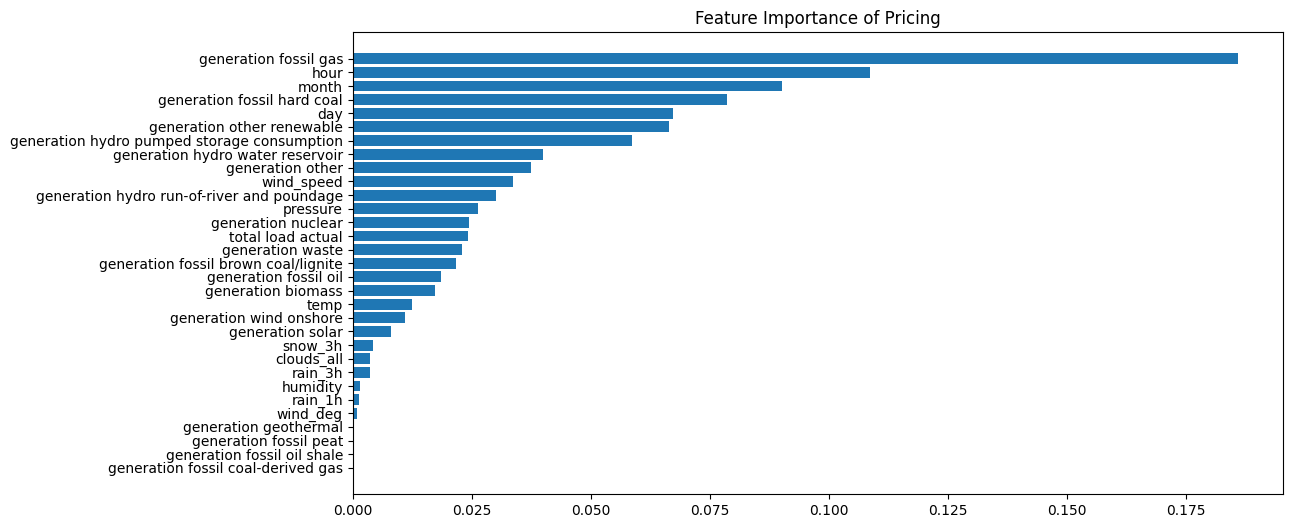

In [28]:
#get important features
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

#create graph
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance of Pricing')

# Optimization

In [84]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies_new = pd.get_dummies(df.loc[:,df.columns != "price actual"])

In [85]:
# Split our preprocessed data into our features and target arrays
y_new = df["price actual"].values
#X = application_df.drop(["IS_SUCCESSFUL"],axis=1).values
X_new = dummies_new
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.15)

In [86]:
model_new = XGBRegressor()

In [87]:
model_new.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [88]:
score_new = model_new.score(X_train, y_train)
print(f"score: {score_new}")
print(f"improved by: {score_new - score}")

score: 0.9406938462751765
improved by: 0.0011699979550062745
